In [56]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Rescaling,BatchNormalization
from keras.layers import Conv2D,MaxPool2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
batch_size=32
num_classes=10
epochs=50

In [4]:
### Splitting the train and test sets
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('x_train shape:',x_train.shape)

170498071/170498071 [==============================] - 63s 0us/step
x_train shape: (50000, 32, 32, 3)


In [5]:
print(x_train.shape[0])
print(x_test.shape[0])

50000
10000


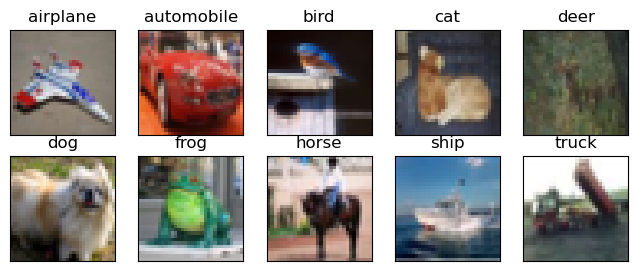

In [26]:
### Plotting some random 10 images 
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    index=np.where(y_train[:]==i)[0][1]### index of the label corresponding to i
    plt.imshow(x_train[index])
    ax.set_title(class_names[i])
plt.show()

In [29]:
## Convert class vectors to the categorical format
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [33]:
### so our y_train and y_test has been converted to one hot encoded vectors
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Experiment 1 

In [49]:
### Normalizing the dataset
normalization_layer = Rescaling(scale=1./255)
x_train = normalization_layer(x_train)
x_test = normalization_layer(x_test)

In [50]:
model = Sequential()

model.add(Conv2D(32,3,padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [52]:
### compiling
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                      

### Training the model

In [54]:
model.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

Epoch 1/50


1442/1563 [==========================>...] - ETA: 8s - loss: 2.1458 - accuracy: 0.1980

KeyboardInterrupt: 

In [ ]:
import pandas as pd
res = pd.DataFrame({
    'Experiment':['Conv+Drop'],
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 2

In [58]:
model2 = Sequential()

model2.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(3,3),))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [59]:
## Compilation
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model2.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['Conv+BN'],
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 3

In [ ]:
## Experiment - III: Use batch normalization and dropouts after every convolutional layer. Also, retain the dropouts in the FC layer.
model3=Sequential()

model3.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64,(3,3),padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

## Compilation
model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model3.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['Conv+Dropout+BN'],
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 4

In [ ]:
## Remove dropouts from conv layers, use L2 + dropouts in FC, use BN
from tensorflow.keras.regularizers import l2
model4=Sequential()

model4.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(32,(3,3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),padding='same'))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(64,(3,3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(512,kernel_regularizer=l2(0.01)))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

## Compilation
model4.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model4.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['BN+L2']
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 5

In [ ]:
## Adding in Dropout, BN and L2 regularization
model5=Sequential()

model5.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(32,(3,3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64,(3,3),padding='same'))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(64,(3,3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512,kernel_regularizer=l2(0.01)))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

## Compilation
model5.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model5.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['Drop+BN+L2']
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 6

In [ ]:
model6=Sequential()

model6.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(32,(3,3)))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(64,(3,3),padding='same'))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64,(3,3)))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128,(3,3),padding='same'))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128,(3,3)))
model6.add(Activation('relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(512,kernel_regularizer=l2(0.01)))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes))
model6.add(Activation('softmax'))

## Compilation
model6.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model6.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['Drop+BN+L2+CNN']
    'Train_Acc' : ,
    'Val_Acc' : 
})
res

### Experiment 7 

In [ ]:
###Adding additional feature map
model7=Sequential()

model7.add(Conv2D(64,(3,3),padding='same',input_shape =x_train.shape[1:]))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(Conv2D(64,(3,3)))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(128,(3,3),padding='same'))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(Conv2D(128,(3,3)))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.25))


model7.add(Flatten())
model7.add(Dense(512,kernel_regularizer=l2(0.01)))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes))
model7.add(Activation('softmax'))

## Compilation
model7.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
## Training the model
model7.fit(x_train,y_train,batch_size=batch_size,
          epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

res = pd.DataFrame({
    'Experiment':['Drop+BN+feature map+l2']
    'Train_Acc' : ,
    'Val_Acc' : 
})
res